<center><h2>
<a href="https://masumbhai.me">Kindly visit my portfolio to see more of my works</a>
</h2></center>

In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dask import dataframe as dd
from sklearn.utils import shuffle
warnings.filterwarnings("ignore")

#### From feature engineering, final selected features were stored in csv dataframe
##### important: we need that Label Encoded Dataframe csv

In [2]:
def readCSV_Function(file_path):
    dask_df = dd.read_csv(file_path, blocksize=1e6)
    dask_df = dask_df.repartition(npartitions=8)
    return dask_df.compute(scheduler='threads')

working_dataframe_filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Column_Data_Cleaning\\After_Label_Encoding.csv"
df = readCSV_Function(working_dataframe_filePath)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df = shuffle(df)

features_filepath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Feature_Engineering\\Selected_Features_along_with_PCA.csv"
features_df = readCSV_Function(features_filepath)
features_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

In [3]:
final_selected_features = sorted(list(features_df["Names"]))
new_df = df[final_selected_features]
new_df

,ACK Flag Count,Active Max,Active Min,Active Std,Avg Packet Size,Bwd Header Length,Bwd IAT Max,Bwd IAT Mean,Bwd IAT Min,Bwd IAT Std,...,Packet Length Mean,Packet Length Min,Packet Length Std,Packet Length Variance,Protocol,RST Flag Count,SYN Flag Count,Subflow Bwd Packets,Subflow Fwd Packets,URG Flag Count
1346,0,0.0,0.0,0.0,86.75,64,3.0,3.0,3.0,0.0,...,69.400002,43.0,36.149689,1306.800049,17,0,0,2,2,0
2200,0,0.0,0.0,0.0,2124.00,0,0.0,0.0,0.0,0.0,...,1416.000000,1416.0,0.000000,0.000000,17,0,0,0,2,0
2273,0,0.0,0.0,0.0,2055.00,0,0.0,0.0,0.0,0.0,...,1370.000000,1370.0,0.000000,0.000000,17,0,0,0,2,0
933,0,0.0,0.0,0.0,401.50,0,0.0,0.0,0.0,0.0,...,344.142853,321.0,33.617596,1130.142822,17,0,0,0,6,0
1211,0,0.0,0.0,0.0,597.50,0,0.0,0.0,0.0,0.0,...,478.000000,478.0,0.000000,0.000000,17,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,0,0.0,0.0,0.0,1920.00,0,0.0,0.0,0.0,0.0,...,1280.000000,1280.0,0.000000,0.000000,17,0,0,0,2,0
919,1,0.0,0.0,0.0,0.00,40,54.0,54.0,54.0,0.0,...,0.000000,0.0,0.000000,0.000000,6,0,0,2,2,0
1339,0,0.0,0.0,0.0,602.00,0,0.0,0.0,0.0,0.0,...,516.000000,516.0,0.000000,0.000000,17,0,0,0,6,0
1397,0,0.0,0.0,0.0,432.00,0,0.0,0.0,0.0,0.0,...,345.600006,330.0,21.361179,456.299988,17,0,0,0,4,0


<center><h3 style="background:#00FF00;color:black">
Saving New DataFrame as csv file to new location
</h3></center>

In [4]:
filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Feature_Engineering\\"
fileName = "Feature_Engineered_Data_with_Label_Encoded.csv"
new_df.to_csv(filePath+fileName)

<center><h3 style="background:#FDD835;color:black">
Making Balanced Dataset using SMOTE
</h3></center>

In [5]:
y = new_df['Label']
X = new_df.drop(columns='Label')

In [7]:
from collections import Counter
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=3,random_state = 37)
X_res,y_res = sm.fit_resample(X,y) # resampled

Label:0  n:44967  9.09%
Label:1  n:44967  9.09%
Label:5  n:44967  9.09%
Label:6  n:44967  9.09%
Label:3  n:44967  9.09%
Label:9  n:44967  9.09%
Label:10  n:44967  9.09%
Label:2  n:44967  9.09%
Label:4  n:44967  9.09%
Label:8  n:44967  9.09%
Label:7  n:44967  9.09%


In [11]:
Label_encoded_filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Column_Data_Cleaning\\Label_Encoding.csv"
Label_visualize_df = readCSV_Function(Label_encoded_filePath)
# Summarize distribution
counter = Counter(y_res)
for i,j in counter.items():
    decoded_value = Label_visualize_df[Label_visualize_df['Encoding']== i]['Label'].values[0]
    per = j/len(y_res) * 100
    print(f"Label:{decoded_value}  n:{j}  {per:.3}%")

Label:BENIGN  n:44967  9.09%
Label:DrDoS_DNS  n:44967  9.09%
Label:DrDoS_SNMP  n:44967  9.09%
Label:DrDoS_SSDP  n:44967  9.09%
Label:DrDoS_MSSQL  n:44967  9.09%
Label:TFTP  n:44967  9.09%
Label:UDP-lag  n:44967  9.09%
Label:DrDoS_LDAP  n:44967  9.09%
Label:DrDoS_NTP  n:44967  9.09%
Label:Syn  n:44967  9.09%
Label:DrDoS_UDP  n:44967  9.09%


#### for perfectly visualization, neet to match label with encode_labeling_dataframe

#### Bar Chart of "Label" Feature or target variable

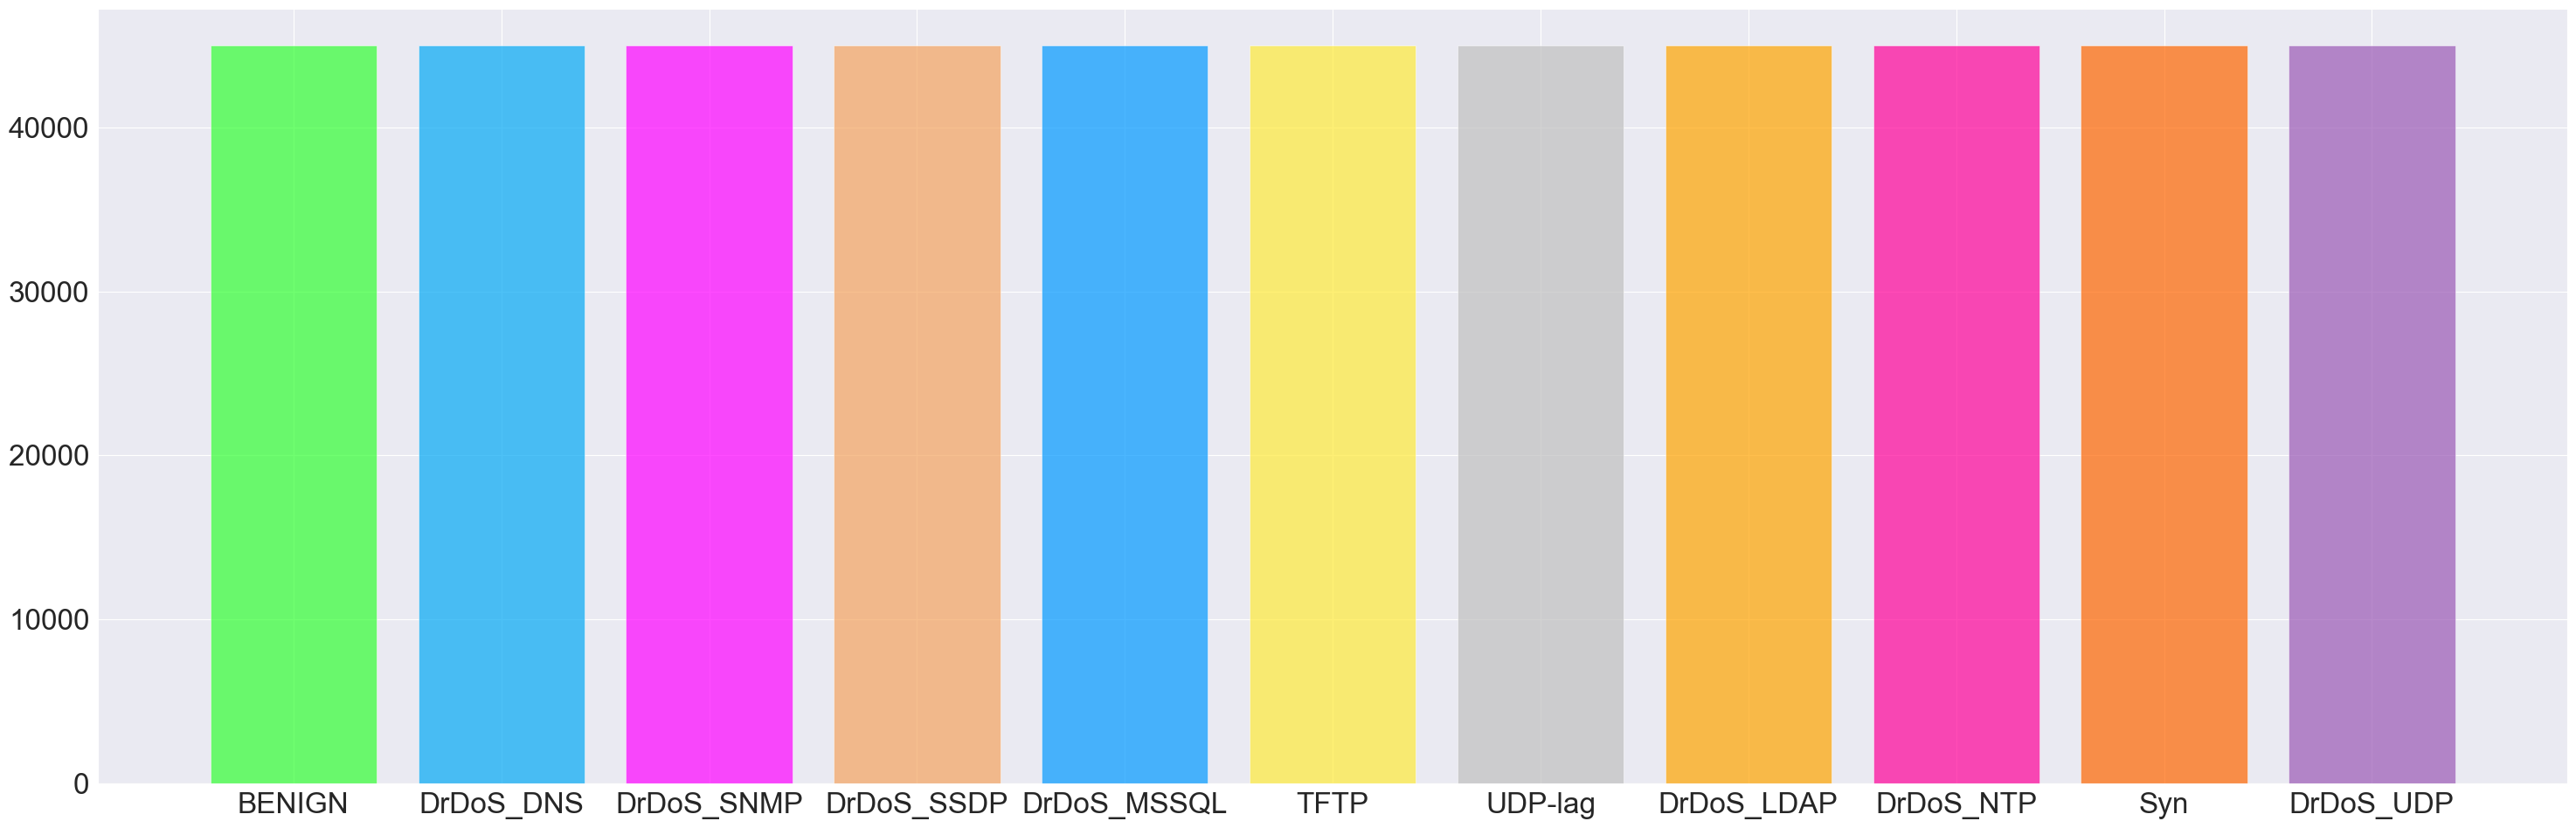

In [18]:
imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "After_SMOTE.png"
colors = ["#33FF33","#03A9F4","magenta","#F4A460","#0099FF","#FFEB3B","#C0C0C0","orange","#FF0099","#FF6600","#9B59B6"]

x_list = []
for i in counter.keys():
    decoded_value = Label_visualize_df[Label_visualize_df['Encoding']== i]['Label'].values[0]
    x_list.append(decoded_value)

plt.figure(figsize=(30,10))
plt.bar(x=x_list,height=counter.values(),color=colors,alpha=0.7,align="center",linewidth=0.5)
plt.rcParams['font.size'] = 24
plt.tight_layout()
plt.savefig(imgPath+imgName)
#hello bondhu , I am back !

#### Now need to implement model building with ensemble with attention model
#### But before that, need to split dataset, we will use k-fold here

In [ ]:
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import scikitplot as skplot
from sklearn.model_selection import KFold

# Define the number of folds
k = 5

# Split the data into k folds
kf = KFold(n_splits=k)

# Initialize arrays to store the results
train_scores = np.zeros(k)
test_scores = np.zeros(k)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]

    # fitting the model
    model = LogisticRegression(max_iter=435000)
    strategy = OneVsRestClassifier(model)
    strategy.fit(X_train,y_train)
    # making predictions
    y_pred = strategy.predict(X_test)
    print(classification_report(y_test,y_pred))


    # Evaluate the model on the training data
    train_scores[i] = strategy.score(X_train, y_train)

    # Evaluate the model on the test data
    test_scores[i] = strategy.score(X_test, y_test)

    # Plotting the confusion matrix
    skplot.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(16,16))

# Compute the average train and test scores
average_train_score = np.mean(train_scores)
average_test_score = np.mean(test_scores)

print(average_train_score,average_test_score)